In [2]:
from keras.datasets import cifar10


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets
from sklearn import ensemble
from sklearn import discriminant_analysis
from sklearn import neighbors
from sklearn import random_projection
from sklearn import decomposition
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import manifold

from scipy import ndimage

from time import time
import os

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [15]:
import numpy as np
import tensorflow.compat.v2 as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
import umap

In [7]:
labels = {0:'airplane',1:'automobile',
          2:'bird',3:'cat',4:'deer',
          5:'dog',6:'frog',7:'horse',
          8:'ship',9:'truck'}

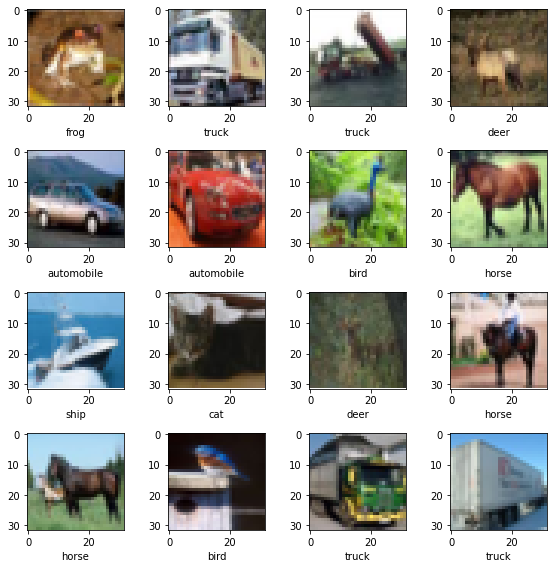

In [8]:
#visualization of dataset 
fig,ax=plt.subplots(4,4,figsize=(8,8))
ax=ax.ravel()

for i in range(16):
    ax[i].imshow(X_train[i])
    ax[i].set(xlabel=labels[int(y_train[i])])

plt.tight_layout()


In [22]:
# Reshaping the train and test data
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

In [24]:
#normalizing 
X_train = X_train/255
X_test = X_test/255

In [26]:
# Converting to one-hot encoded vectors
EN = OneHotEncoder(categories='auto')
y_train = EN.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = EN.transform(y_test.reshape(-1, 1)).toarray()

In [27]:
# manifold algorithms
manifold_algorithms = [
    ('PCA', PCA(n_components=2)),
    ('MDS', MDS(n_components=2)),
    ('SE', SpectralEmbedding(n_components=2)),
    ('Isomap', Isomap(n_components=2)),
    ('LLE', LocallyLinearEmbedding(n_components=2)),
    ('t-SNE', TSNE(n_components=2, perplexity=30)),
    ('UMAP', umap.UMAP(n_components=2, random_state=42))
]

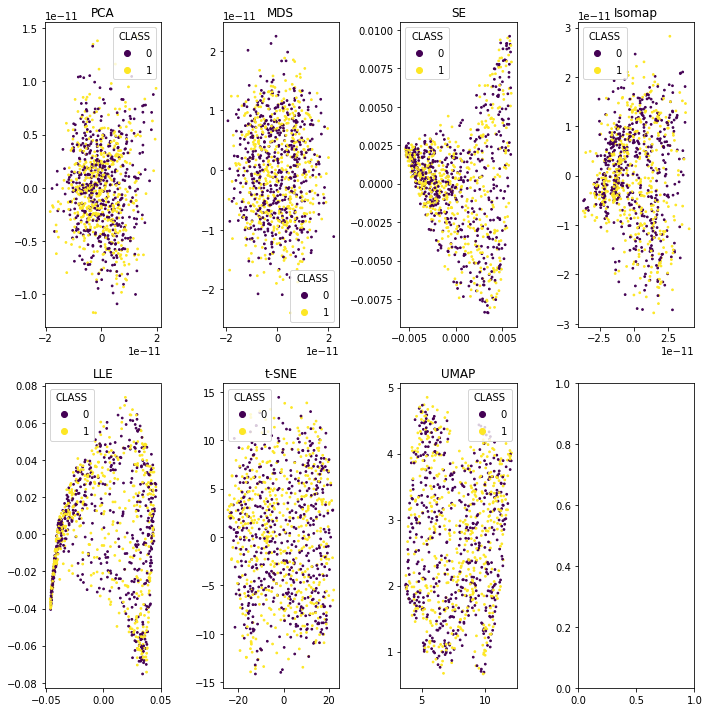

In [37]:
# Plot
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 10))
axs = axs.ravel()

for i, (Name, algorithm) in enumerate(manifold_algorithms):
    X_manifold = algorithm.fit_transform(X_train[:1000])
    scatter = axs[i].scatter(X_manifold[:, 0], 
                             X_manifold[:, 1], 
                             c=y_train.argmax(axis=1)[:1000], 
                             s=3, 
                             cmap= None, 
                             label=y_train[:1000].argmax(axis=1)[:1000])
    axs[i].set_title(Name)
    axs[i].legend(*scatter.legend_elements(), title="CLASS")

plt.tight_layout()
plt.show()
